In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


df_municipios = pd.read_csv('../dados/simu_carteira_municipios.csv')
df_agrupado = pd.read_csv('../dados/tratados/agrupamento_empreend_acidentes_por_municipio.csv')

In [2]:
df_agrupado

,Código IBGE,vlr_investimento,pop_beneficiada,num_total_empreendimentos,aux_emp_implantacao,aux_emp_implantacao_vlr_investimento,aux_emp_pavimentacao,aux_emp_pavimentacao_vlr_investimento,aux_emp_refrota,aux_emp_refrota_vlr_investimento,aux_emp_sinalizacao,aux_emp_sinalizacao_vlr_investimento,aux_emp_calcamento,aux_emp_calcamento_vlr_investimento,aux_emp_ciclovia,aux_emp_ciclovia_vlr_investimento,aux_emp_corredor,aux_emp_corredor_vlr_investimento,aux_emp_drenagem,aux_emp_drenagem_vlr_investimento,aux_emp_ferrovia,aux_emp_ferrovia_vlr_investimento,aux_emp_transporte,aux_emp_transporte_vlr_investimento,aux_emp_brt,aux_emp_brt_vlr_investimento,aux_emp_vlt,aux_emp_vlt_vlr_investimento,aux_emp_qualificacao,aux_emp_qualificacao_vlr_investimento,aux_emp_mobilidade_urbana,aux_emp_mobilidade_urbana_vlr_investimento,aux_emp_aquisicao,aux_emp_aquisicao_vlr_investimento,aux_emp_polongamento,aux_emp_polongamento_vlr_investimento,aux_emp_ampliacao,aux_emp_ampliacao_vlr_investimento,aux_emp_recapeamento,aux_emp_recapeamento_vlr_investimento,aux_emp_linha,aux_emp_linha_vlr_investimento,aux_emp_metro,aux_emp_metro_vlr_investimento,aux_emp_viaria,aux_emp_viaria_vlr_investimento,aux_emp_aero,aux_emp_aero_vlr_investimento,aux_emp_revitalizacao,aux_emp_revitalizacao_vlr_investimento,aux_emp_infraestrutura,aux_emp_infraestrutura_vlr_investimento,aux_emp_pac2etapa,aux_emp_pac2etapa_vlr_investimento,aux_emp_faixa_exclusiva,aux_emp_faixa_exclusiva_vlr_investimento,aux_emp_rapido,aux_emp_rapido_vlr_investimento,aux_emp_sarjeta,aux_emp_sarjeta_vlr_investimento,aux_emp_nan,aux_emp_nan_vlr_investimento,programa_AVANÇAR PÚBLICO,programa_AVANÇAR PÚBLICO_vlr_investimento,programa_EMENDAS,programa_EMENDAS_vlr_investimento,programa_PAC FIN,programa_PAC FIN_vlr_investimento,programa_PAC OGU,programa_PAC OGU_vlr_investimento,programa_PRÓ COMUNIDADE,programa_PRÓ COMUNIDADE_vlr_investimento,programa_SETOR PRIVADO,programa_SETOR PRIVADO_vlr_investimento,vlr_investimento_per_capita,pop_beneficiada_per_capita,densidade_populacional,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,Ocup_veic_transp_pesado_mortes,Ocup_onibus_mortes,Outros_mortes,total_mortes,taxa_mun_mortes,taxa_mun_pedestre_mortes,taxa_mun_ciclista_mortes,taxa_mun_motociclista_mortes,taxa_mun_automovel_mortes,taxa_mun_veiculo_pesado_mortes,taxa_mun_onibus_mortes,taxa_mun_outros_mortes,Pedestre_feridos,Ciclista_feridos,Motociclista_feridos,Ocup_triciclo_motor_feridos,Ocup_automovel_feridos,Ocup_caminhonete_feridos,Ocup_veic_transp_pesado_feridos,Ocup_onibus_feridos,Outros_feridos,total_feridos,taxa_mun_feridos,taxa_mun_pedestre_feridos,taxa_mun_ciclista_feridos,taxa_mun_motociclista_feridos,taxa_mun_automovel_feridos,taxa_mun_veiculo_pesado_feridos,taxa_mun_onibus_feridos,taxa_mun_outros_feridos,Populacao,taxa_mun_triciclo_mortes,taxa_mun_caminhonete_mortes,taxa_mun_triciclo_feridos,taxa_mun_caminhonete_feridos
0,1100015.0,2530000.00,3034.0,3.0,0.0,0.00,2.0,1530000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,3.0,2530000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,3.0,2530000.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,106.943583,0.128248,0.003348,0.4,0.1,3.1,0.0,0.0,0.0,0.0,0.1,1.2,4.9,0.019860,0.001624,0.000391,0.012685,0.000000,0.000000,0.000390,0.004770,0.0,0.3,3.7,0.0,0.1,0.0,0.0,0.0,0.2,4.3,0.017275,0.000000,0.001176,0.014921,0.000392,0.000000,0.000000,0.000785,24670.2,0.0,0.000000,0.000000,0.000000
1,1100023.0,51728180.31,60220.0,15.0,3.0,2938773.14,10.0,45917178.98,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1251042.3,0.0,0.0,6.0,7144333.85,0.0,0.0,1.0,36842105.26,0.0,0.0,0.0,0.0,1.0,36842105.26,5.0,40480739.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3225839.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,14.0,14886075.05,1.0,36842105.26,0.0,0.0,0.0,0.0,0.0,0.0,645.

In [3]:
for i in df_agrupado.columns:
    print(i)

Código IBGE
vlr_investimento
pop_beneficiada
num_total_empreendimentos
aux_emp_implantacao
aux_emp_implantacao_vlr_investimento
aux_emp_pavimentacao
aux_emp_pavimentacao_vlr_investimento
aux_emp_refrota
aux_emp_refrota_vlr_investimento
aux_emp_sinalizacao
aux_emp_sinalizacao_vlr_investimento
aux_emp_calcamento
aux_emp_calcamento_vlr_investimento
aux_emp_ciclovia
aux_emp_ciclovia_vlr_investimento
aux_emp_corredor
aux_emp_corredor_vlr_investimento
aux_emp_drenagem
aux_emp_drenagem_vlr_investimento
aux_emp_ferrovia
aux_emp_ferrovia_vlr_investimento
aux_emp_transporte
aux_emp_transporte_vlr_investimento
aux_emp_brt
aux_emp_brt_vlr_investimento
aux_emp_vlt
aux_emp_vlt_vlr_investimento
aux_emp_qualificacao
aux_emp_qualificacao_vlr_investimento
aux_emp_mobilidade_urbana
aux_emp_mobilidade_urbana_vlr_investimento
aux_emp_aquisicao
aux_emp_aquisicao_vlr_investimento
aux_emp_polongamento
aux_emp_polongamento_vlr_investimento
aux_emp_ampliacao
aux_emp_ampliacao_vlr_investimento
aux_emp_recapeamen

In [4]:
df_agrupado_merge = df_agrupado.merge(df_municipios, on='Código IBGE', how='left')
df_agrupado_merge.columns

Index(['Código IBGE', 'vlr_investimento', 'pop_beneficiada',
       'num_total_empreendimentos', 'aux_emp_implantacao',
       'aux_emp_implantacao_vlr_investimento', 'aux_emp_pavimentacao',
       'aux_emp_pavimentacao_vlr_investimento', 'aux_emp_refrota',
       'aux_emp_refrota_vlr_investimento',
       ...
       'mun_FRONTEIRA', 'mun_CAPITAL', 'uf_CODIGO_UF', 'mun_LATITUDE',
       'mun_LONGITUDE', 'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado',
       'uf_SIGLA_UF', 'uf_NOME_UF'],
      dtype='object', length=131)

In [5]:
nulos = df_agrupado_merge.isna().sum()
colunas_com_mais_de_um_nulo = nulos[nulos > 1]
print(colunas_com_mais_de_um_nulo)


vlr_investimento                           25
pop_beneficiada                            25
num_total_empreendimentos                  25
aux_emp_implantacao                        25
aux_emp_implantacao_vlr_investimento       25
                                           ..
programa_SETOR PRIVADO                     25
programa_SETOR PRIVADO_vlr_investimento    25
vlr_investimento_per_capita                25
pop_beneficiada_per_capita                 25
densidade_populacional                     25
Length: 76, dtype: int64


In [6]:
df_agrupado_merge.columns[df_agrupado_merge.isnull().any()]

Index(['vlr_investimento', 'pop_beneficiada', 'num_total_empreendimentos',
       'aux_emp_implantacao', 'aux_emp_implantacao_vlr_investimento',
       'aux_emp_pavimentacao', 'aux_emp_pavimentacao_vlr_investimento',
       'aux_emp_refrota', 'aux_emp_refrota_vlr_investimento',
       'aux_emp_sinalizacao', 'aux_emp_sinalizacao_vlr_investimento',
       'aux_emp_calcamento', 'aux_emp_calcamento_vlr_investimento',
       'aux_emp_ciclovia', 'aux_emp_ciclovia_vlr_investimento',
       'aux_emp_corredor', 'aux_emp_corredor_vlr_investimento',
       'aux_emp_drenagem', 'aux_emp_drenagem_vlr_investimento',
       'aux_emp_ferrovia', 'aux_emp_ferrovia_vlr_investimento',
       'aux_emp_transporte', 'aux_emp_transporte_vlr_investimento',
       'aux_emp_brt', 'aux_emp_brt_vlr_investimento', 'aux_emp_vlt',
       'aux_emp_vlt_vlr_investimento', 'aux_emp_qualificacao',
       'aux_emp_qualificacao_vlr_investimento', 'aux_emp_mobilidade_urbana',
       'aux_emp_mobilidade_urbana_vlr_investimento

In [7]:
def plot_correlacao_com_variavel(data, target_variable, colunas):
    corr = data.corr()
    correl = corr.loc[colunas, target_variable]
    correl = correl.reindex(correl.sort_values(ascending=False).index)
    lab = correl.index

    plt.figure(figsize=(23, 7))

    bars = plt.bar(lab, correl, color='skyblue')

    plt.xticks(rotation=90)
    plt.title(f"Correlação com {target_variable}", fontsize=18)

    # Adiciona os valores de correlação em cima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)  # ha: horizontal alignment

    plt.xlabel('Colunas', fontsize=14)
    plt.ylabel('Correlação', fontsize=14)

    plt.xlim(-0.5, len(lab)-0.5)

    plt.show(True)
    return correl


In [8]:
cols_to_drop = [col for col in df_agrupado.columns if col.startswith('aux_emp') or col.startswith('programa_')]
colunas_selecionadas = list(set(df_agrupado.columns) - set(cols_to_drop))

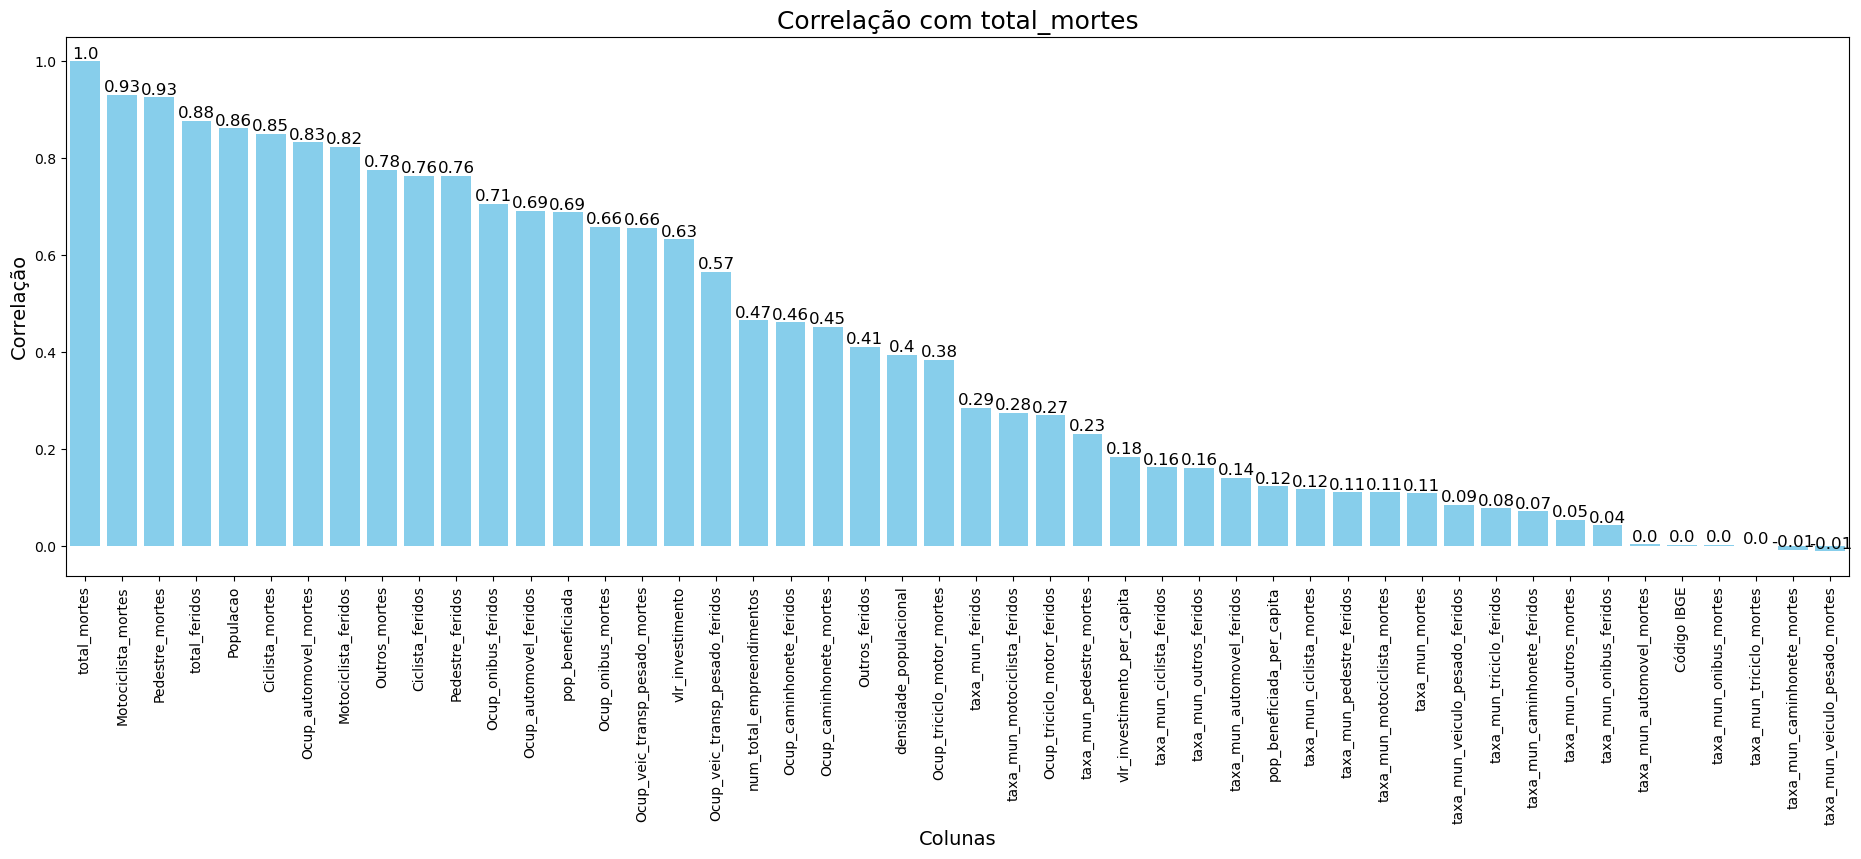

In [9]:
correl = plot_correlacao_com_variavel(df_agrupado, 'total_mortes', colunas_selecionadas)

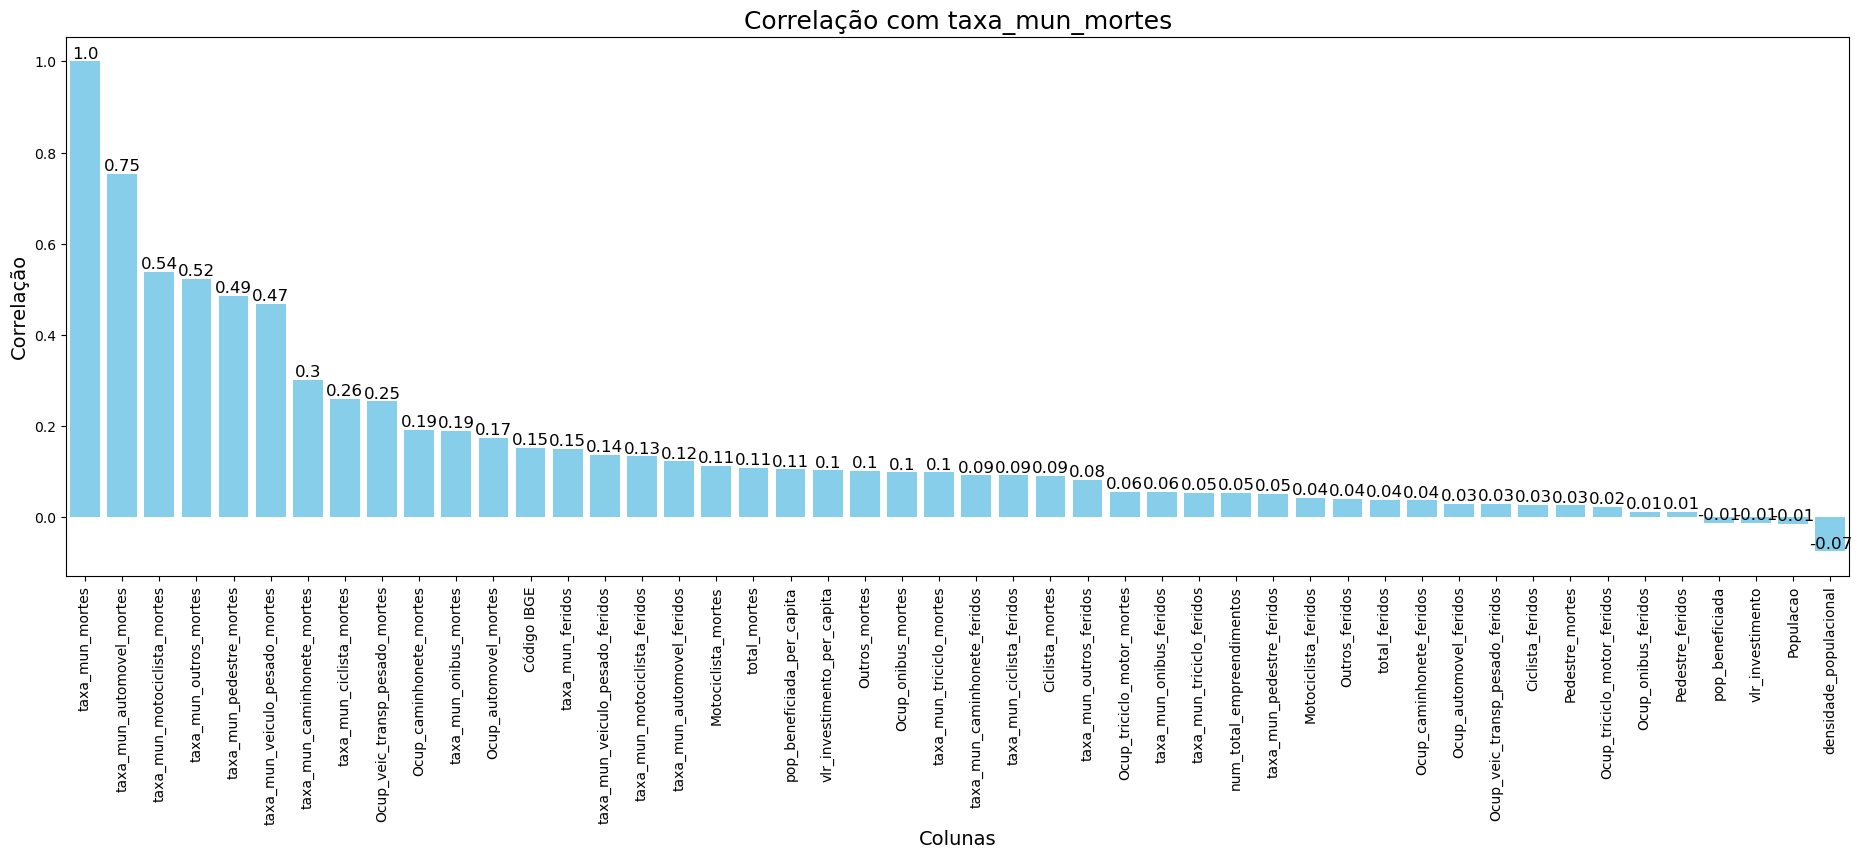

In [10]:
correl = plot_correlacao_com_variavel(df_agrupado, 'taxa_mun_mortes', colunas_selecionadas)

In [11]:
cols_to_drop = [col for col in df_agrupado.columns if col.startswith('aux_emp') or col.startswith('programa_')
                or ('mortes' in col and col not in ['total_mortes', 'taxa_mun_mortes']) or ('feridos' in col and col not in ['total_feridos', 'taxa_mun_feridos'])]
colunas_selecionadas = list(set(df_agrupado.columns) - set(cols_to_drop))

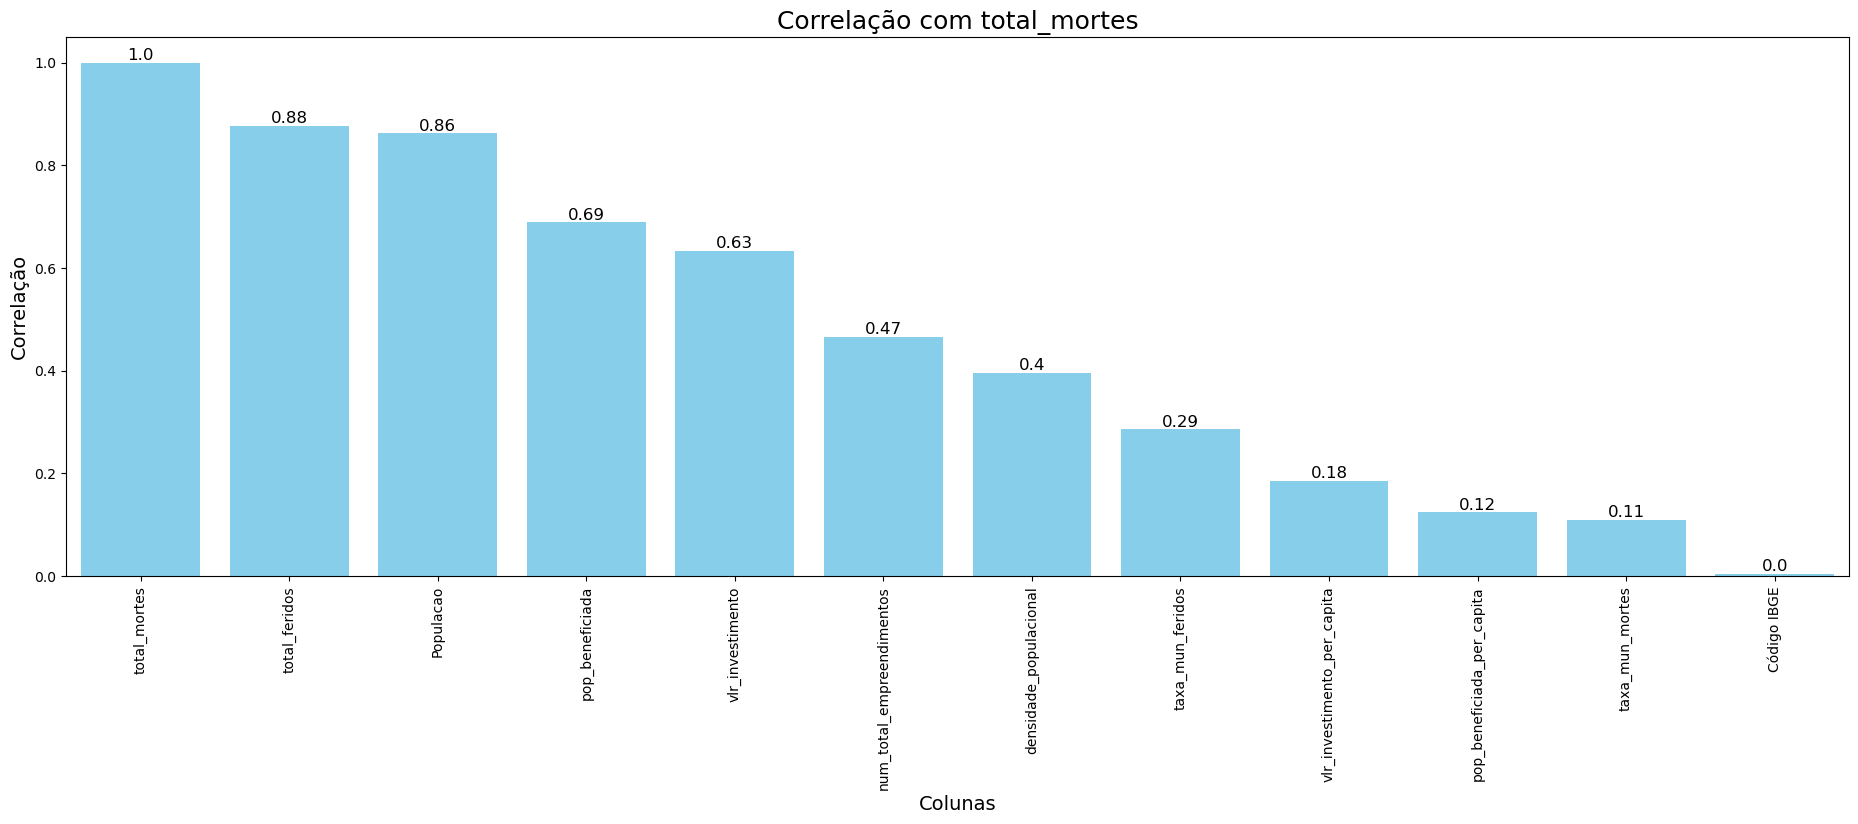

In [12]:
correl = plot_correlacao_com_variavel(df_agrupado, 'total_mortes', colunas_selecionadas)

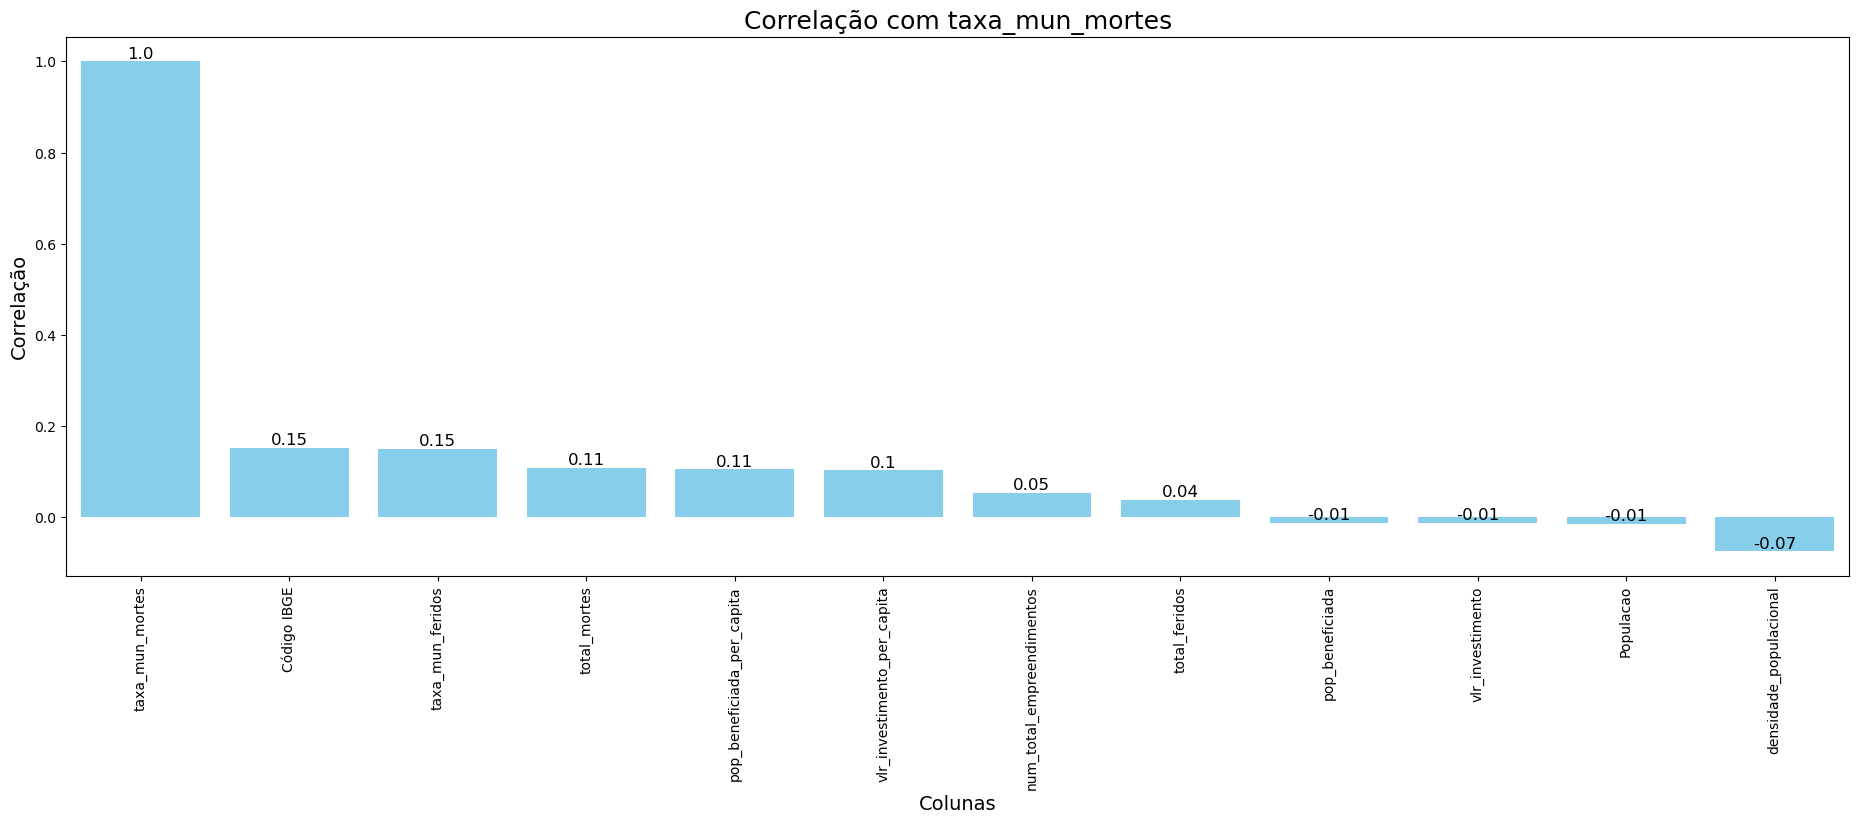

In [13]:
correl = plot_correlacao_com_variavel(df_agrupado, 'taxa_mun_mortes', colunas_selecionadas)

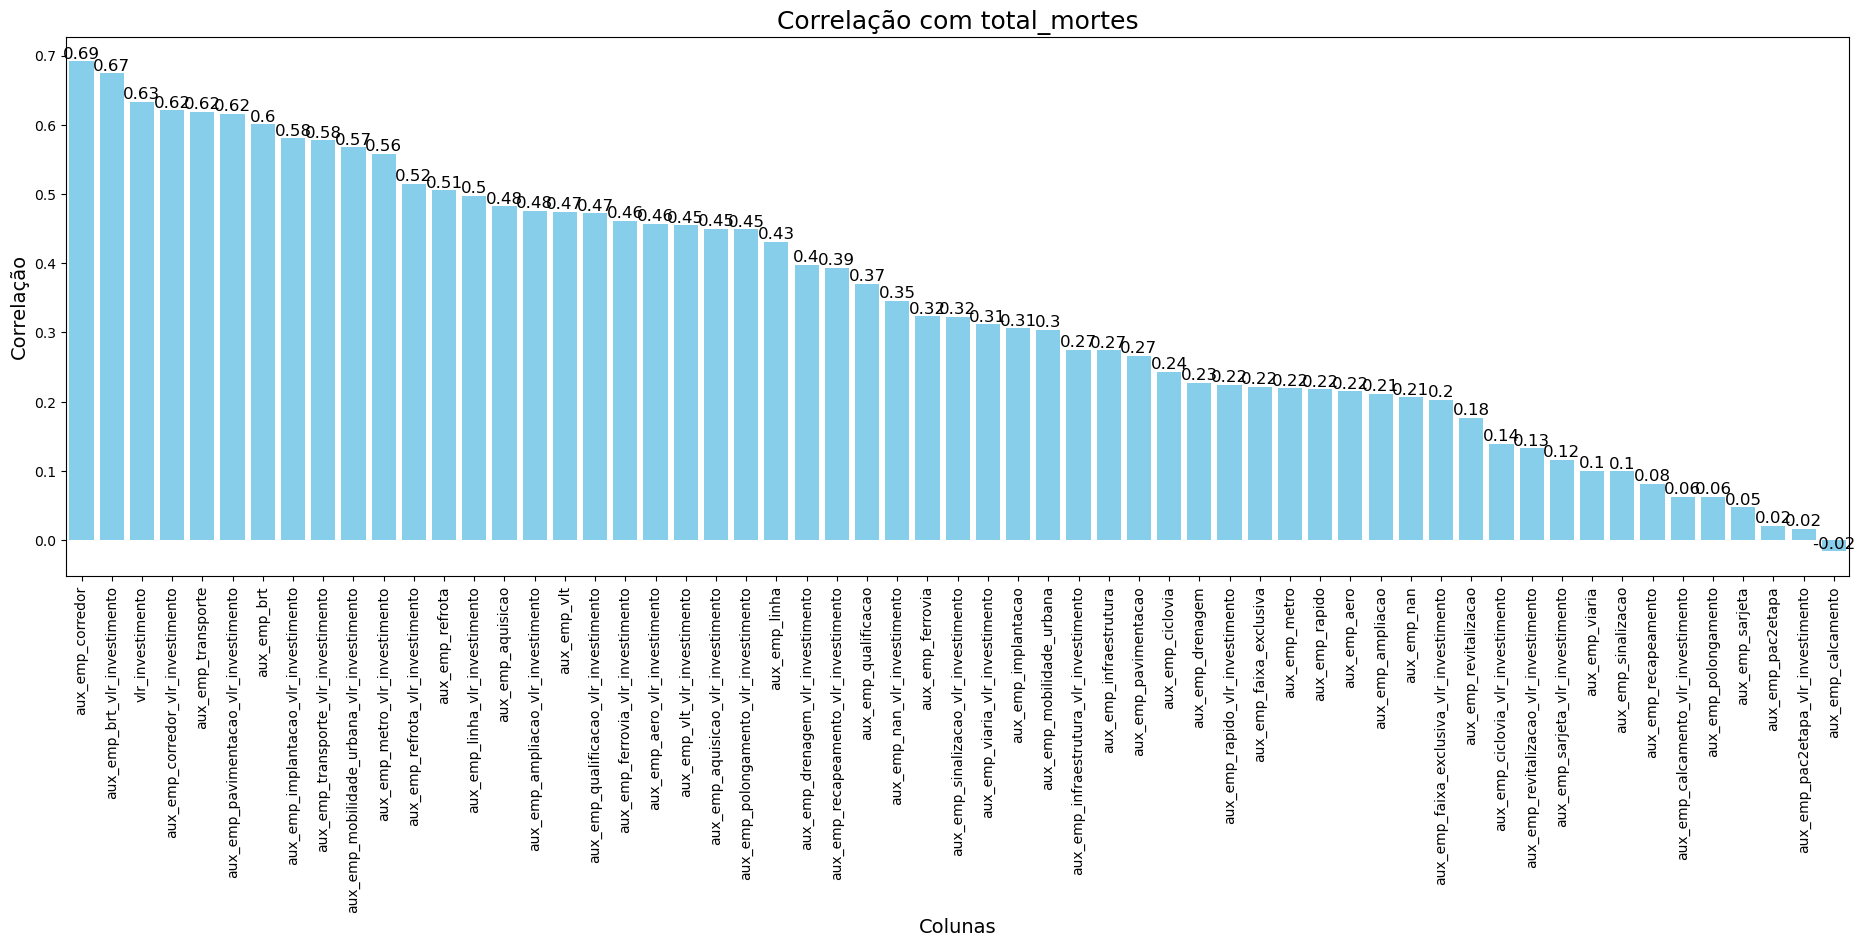

In [14]:
colunas_aux_emp = list(df_agrupado.filter(regex='^'+"aux_emp").columns) + ['vlr_investimento']

coluna_x = 'total_mortes'
correl = plot_correlacao_com_variavel(df_agrupado, coluna_x, colunas_aux_emp)

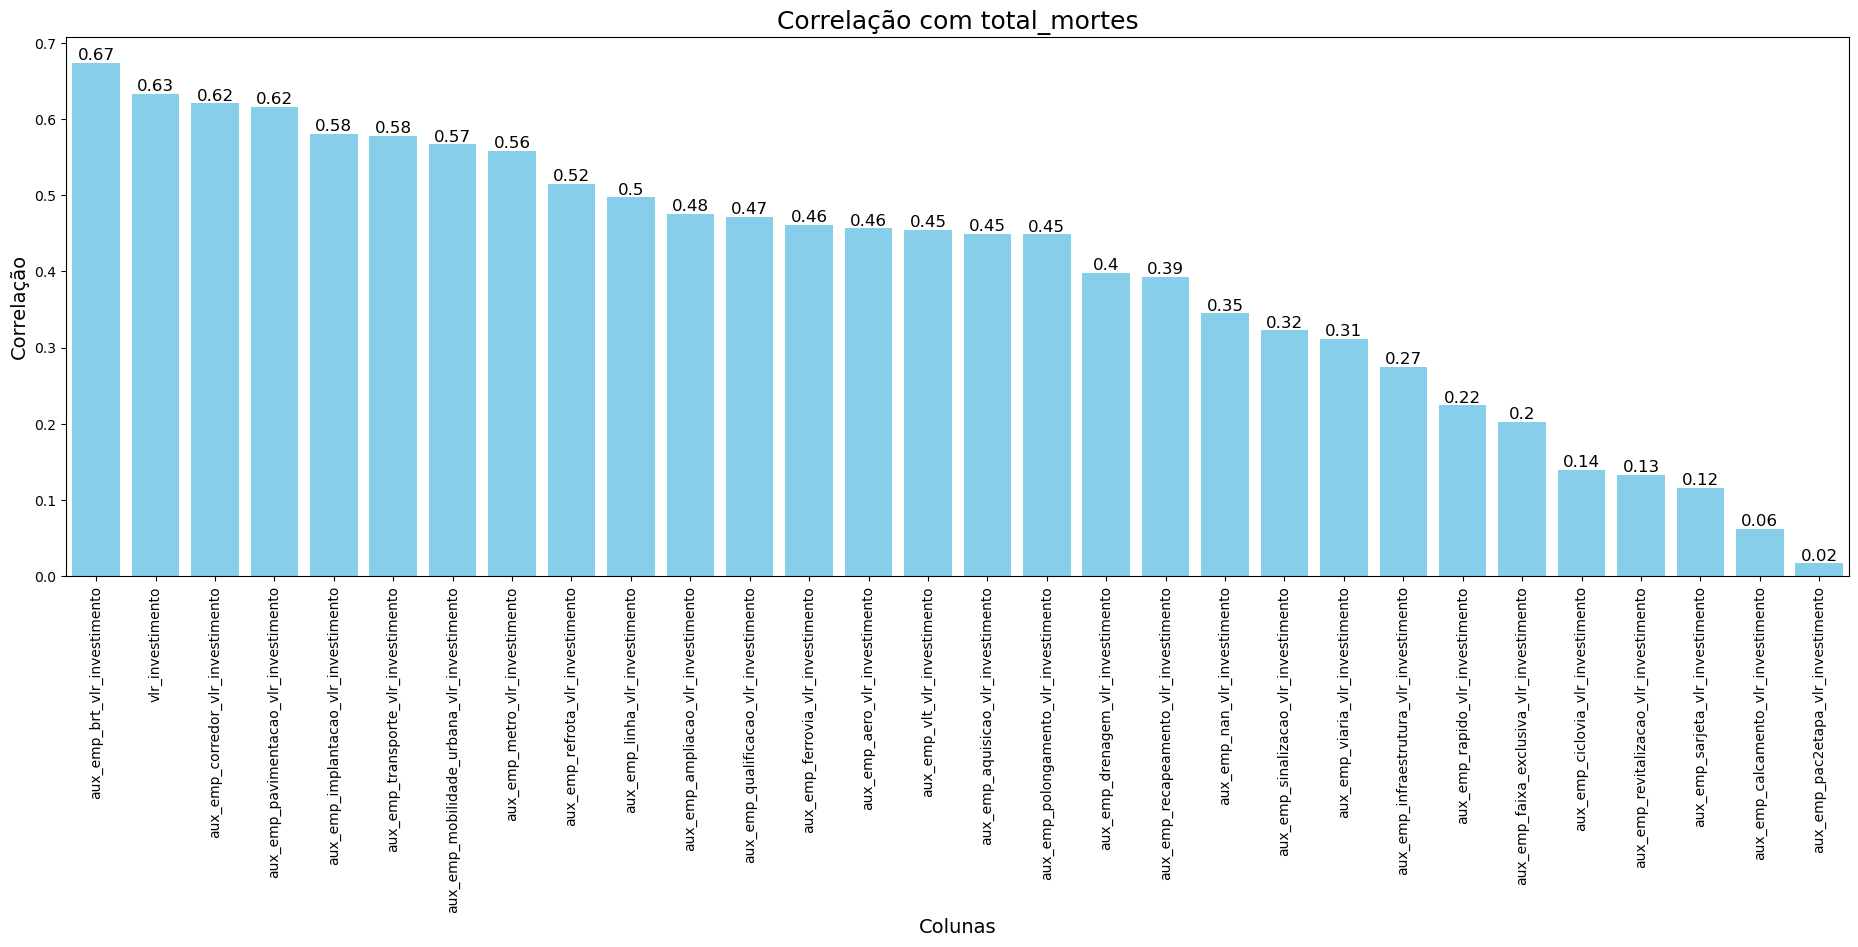

In [15]:
colunas_aux_emp = list(df_agrupado.filter(regex='^aux_emp.*vlr_investimento$').columns) + ['vlr_investimento']
coluna_x = 'total_mortes'
correl = plot_correlacao_com_variavel(df_agrupado, coluna_x, colunas_aux_emp)

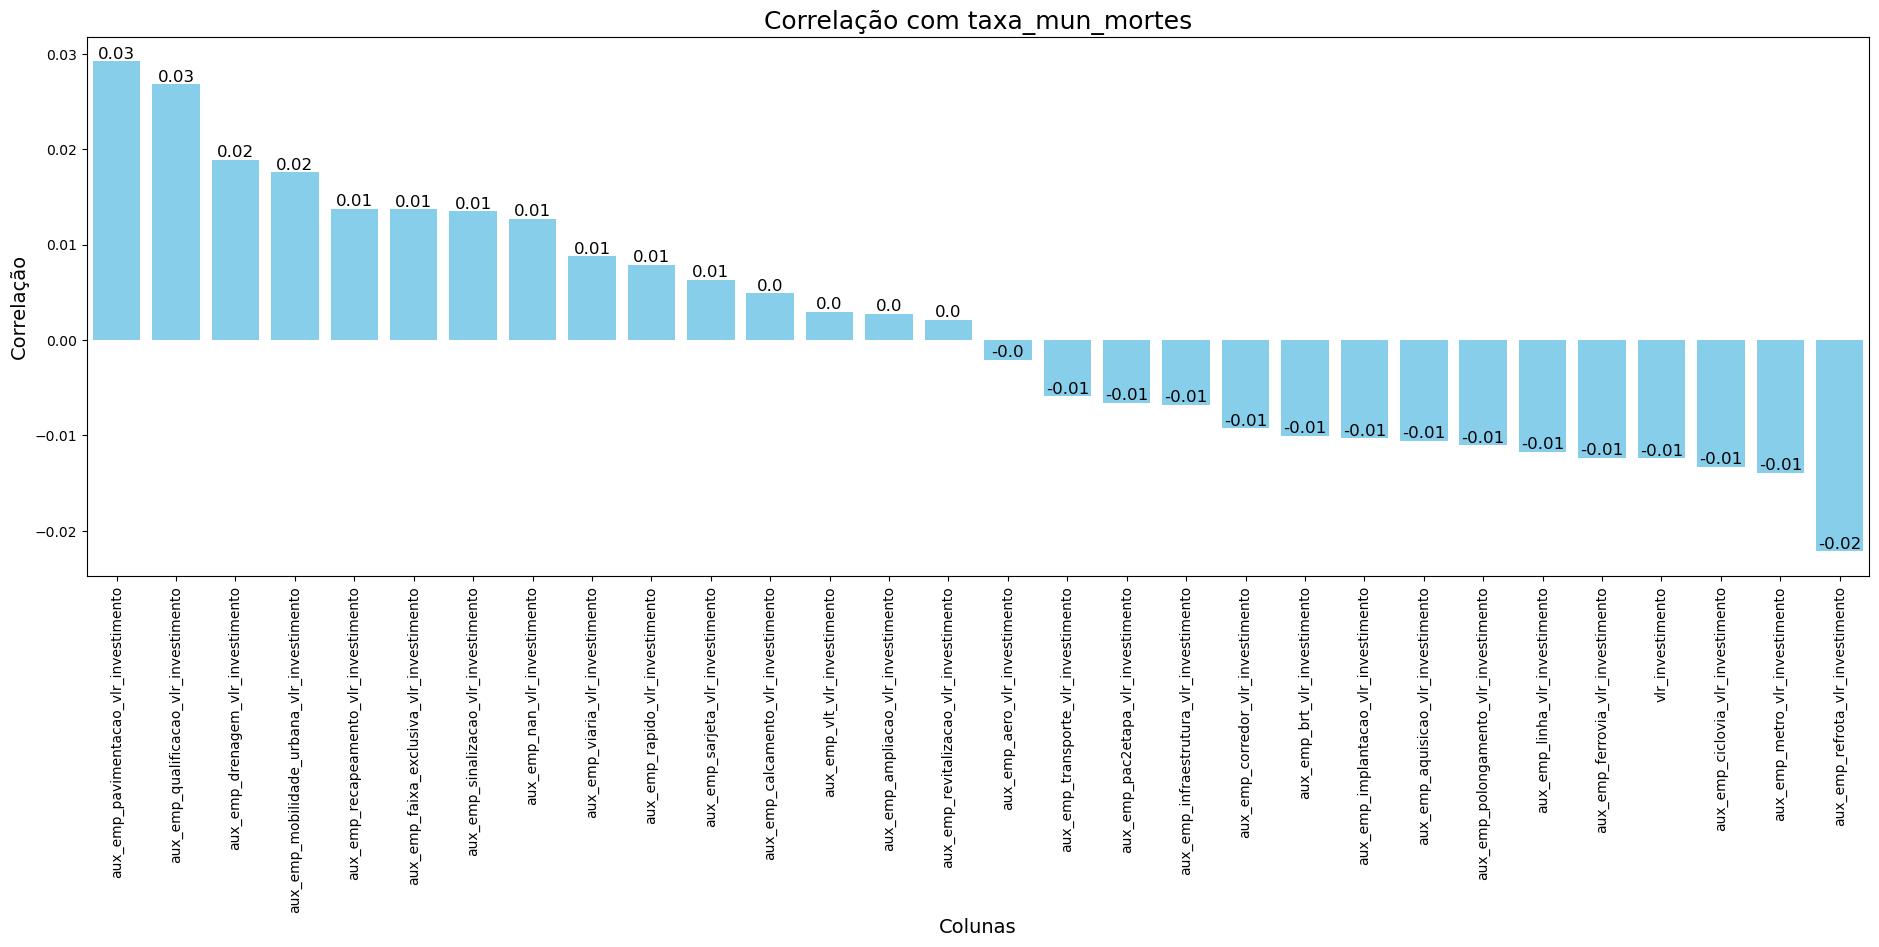

In [16]:
coluna_x = 'taxa_mun_mortes'
correl = plot_correlacao_com_variavel(df_agrupado, coluna_x, colunas_aux_emp)

In [17]:
def plot_all_correlations(data):
    corr = data.corr() # matriz de correlação
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

In [18]:
cols_to_drop = [col for col in df_agrupado.columns if col.startswith('aux_emp') or col.startswith('programa_')
                or ('mortes' in col and col not in ['total_mortes', 'taxa_mun_mortes']) or ('feridos' in col and col not in ['total_feridos', 'taxa_mun_feridos'])]
df_filtrado = df_agrupado.drop(cols_to_drop, axis=1)

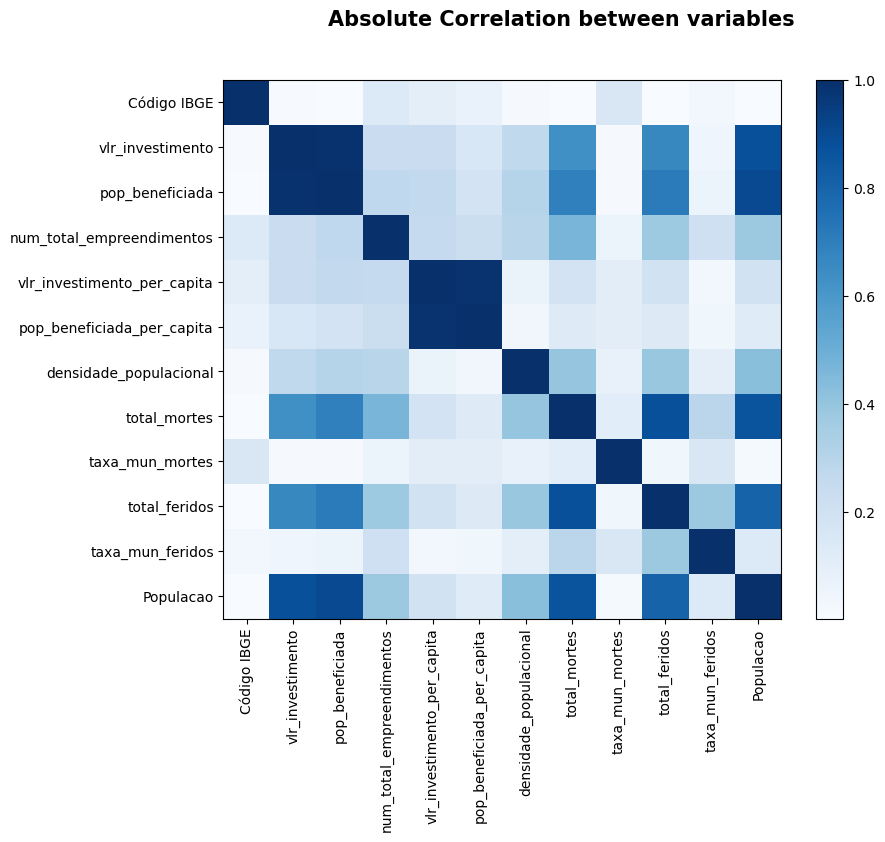

,Código IBGE,vlr_investimento,pop_beneficiada,num_total_empreendimentos,vlr_investimento_per_capita,pop_beneficiada_per_capita,densidade_populacional,total_mortes,taxa_mun_mortes,total_feridos,taxa_mun_feridos,Populacao
Código IBGE,1.000000,0.005795,0.005614,0.136865,0.099889,0.068219,0.013134,0.003823,0.153077,-0.001886,-0.026883,-0.002773
vlr_investimento,0.005795,1.000000,0.991935,0.231420,0.231604,0.155506,0.265669,0.633158,-0.012423,0.661512,0.041766,0.876878
pop_beneficiada,0.005614,0.991935,1.000000,0.267555,0.260884,0.183661,0.300038,0.688710,-0.012118,0.707841,0.054686,0.901042
num_total_empreendimentos,0.136865,0.231420,0.267555,1.000000,0.255062,0.224396,0.291769,0.466124,0.054245,0.375420,0.211580,0.379795
vlr_investimento_per_capita,0.099889,0.231604,0.260884,0.255062,1.000000,0.986543,0.067029,0.184955,0.103581,0.193099,-0.025633,0.192129
pop_beneficiada_per_capita,0.068219,0.155506,0.183661,0.224396,0.986543,1.000000,0.036093,0.124091,0.105252,0.134116,-0.038295,0.120241
densidade_populacional,0.013134,0.265669,0.300038,0.291769,0.067029,0.036093,1.000000,0.395705,-0.074676,0.389587,0.102716,0.424172
total_mortes,0.003823,0.633158,0.688710,0.466124,0.184955,0.124091,0.395705,1.000000,0.109428,0.877501,0.285873,0.862406
taxa_mun_mortes,0.153077,-0.012423,-0.012118,0.054245,0.103581,0.105252,-0.074676,0.109428,1.000000,0.038888,0.150113,-0.014529
total_feridos,-0.001886,0.661512,0.707841,0.375420,0.193099,0.134116,0.389587,0.877501,0.038888,1.000000,0.378465,0.802189


In [19]:
plot_all_correlations(df_filtrado)

In [20]:
df_agrupado[['aux_emp_implantacao', 'aux_emp_pavimentacao']]

,aux_emp_implantacao,aux_emp_pavimentacao
0,0.0,2.0
1,3.0,10.0
2,0.0,2.0
3,1.0,14.0
4,1.0,7.0
...,...,...
5565,NaN,NaN
5566,NaN,NaN
5567,NaN,NaN
5568,NaN,NaN


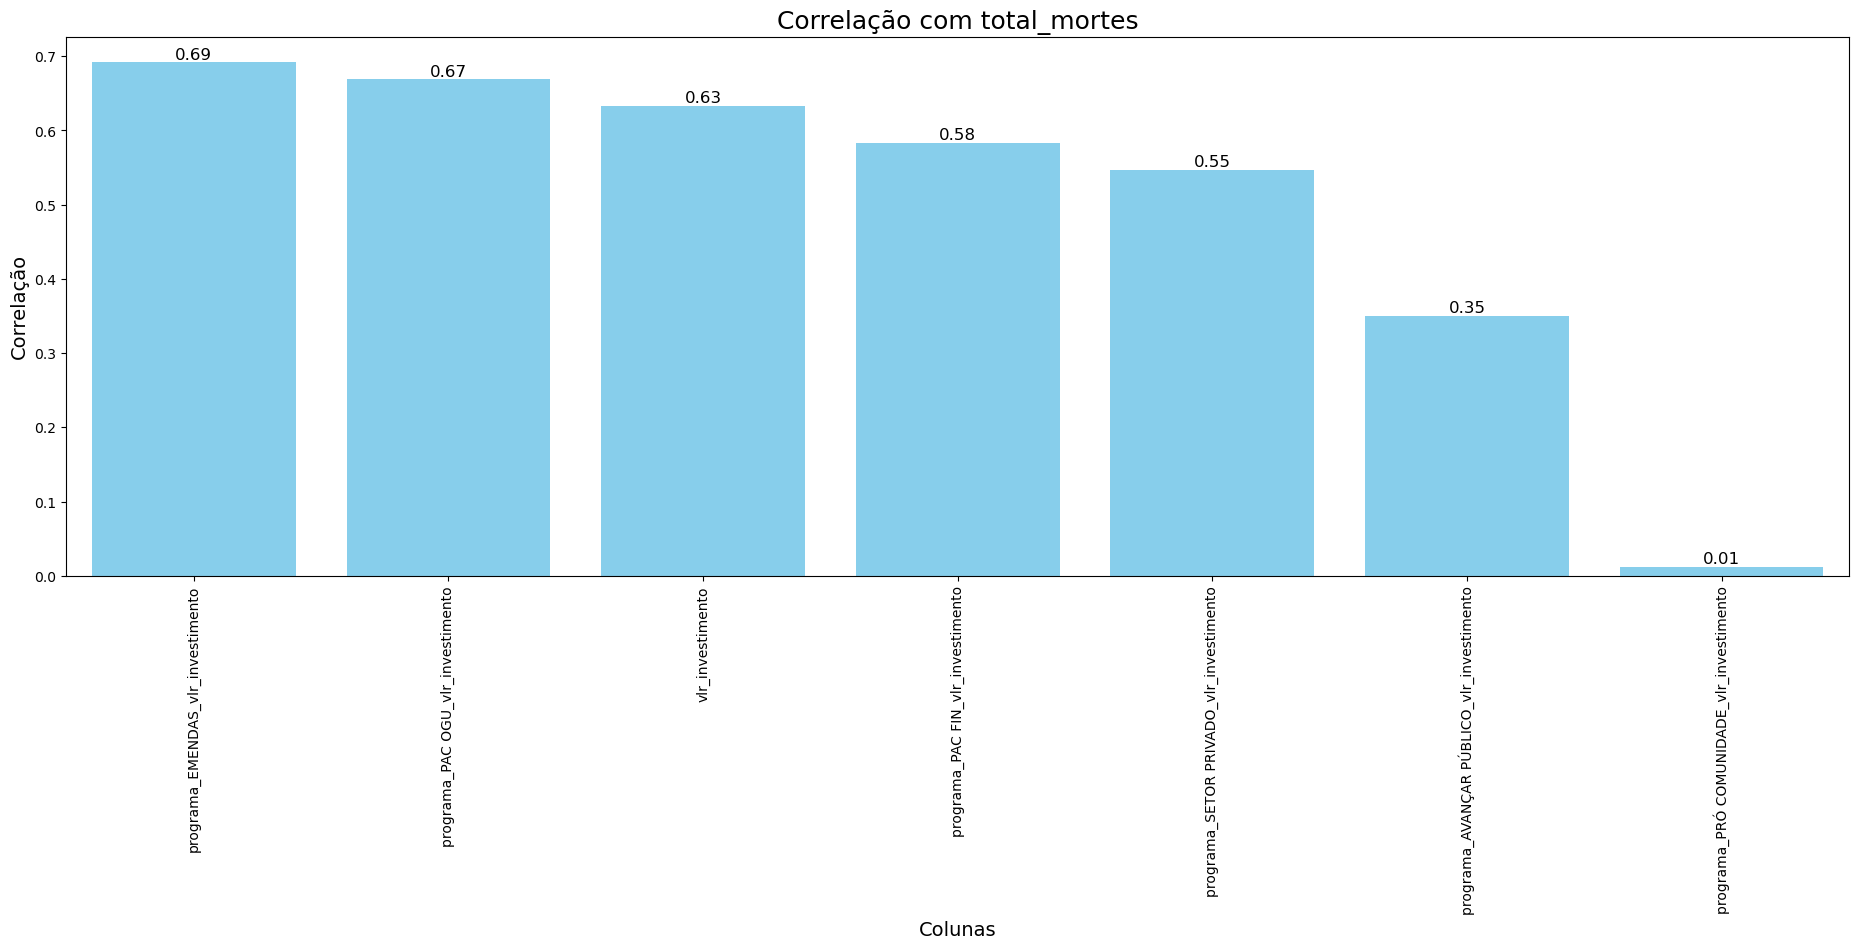

In [21]:
colunas_programa = list(df_agrupado.filter(regex='^programa.*vlr_investimento$').columns) + ['vlr_investimento']
coluna_x = 'total_mortes'
correl = plot_correlacao_com_variavel(df_agrupado, coluna_x, colunas_programa)

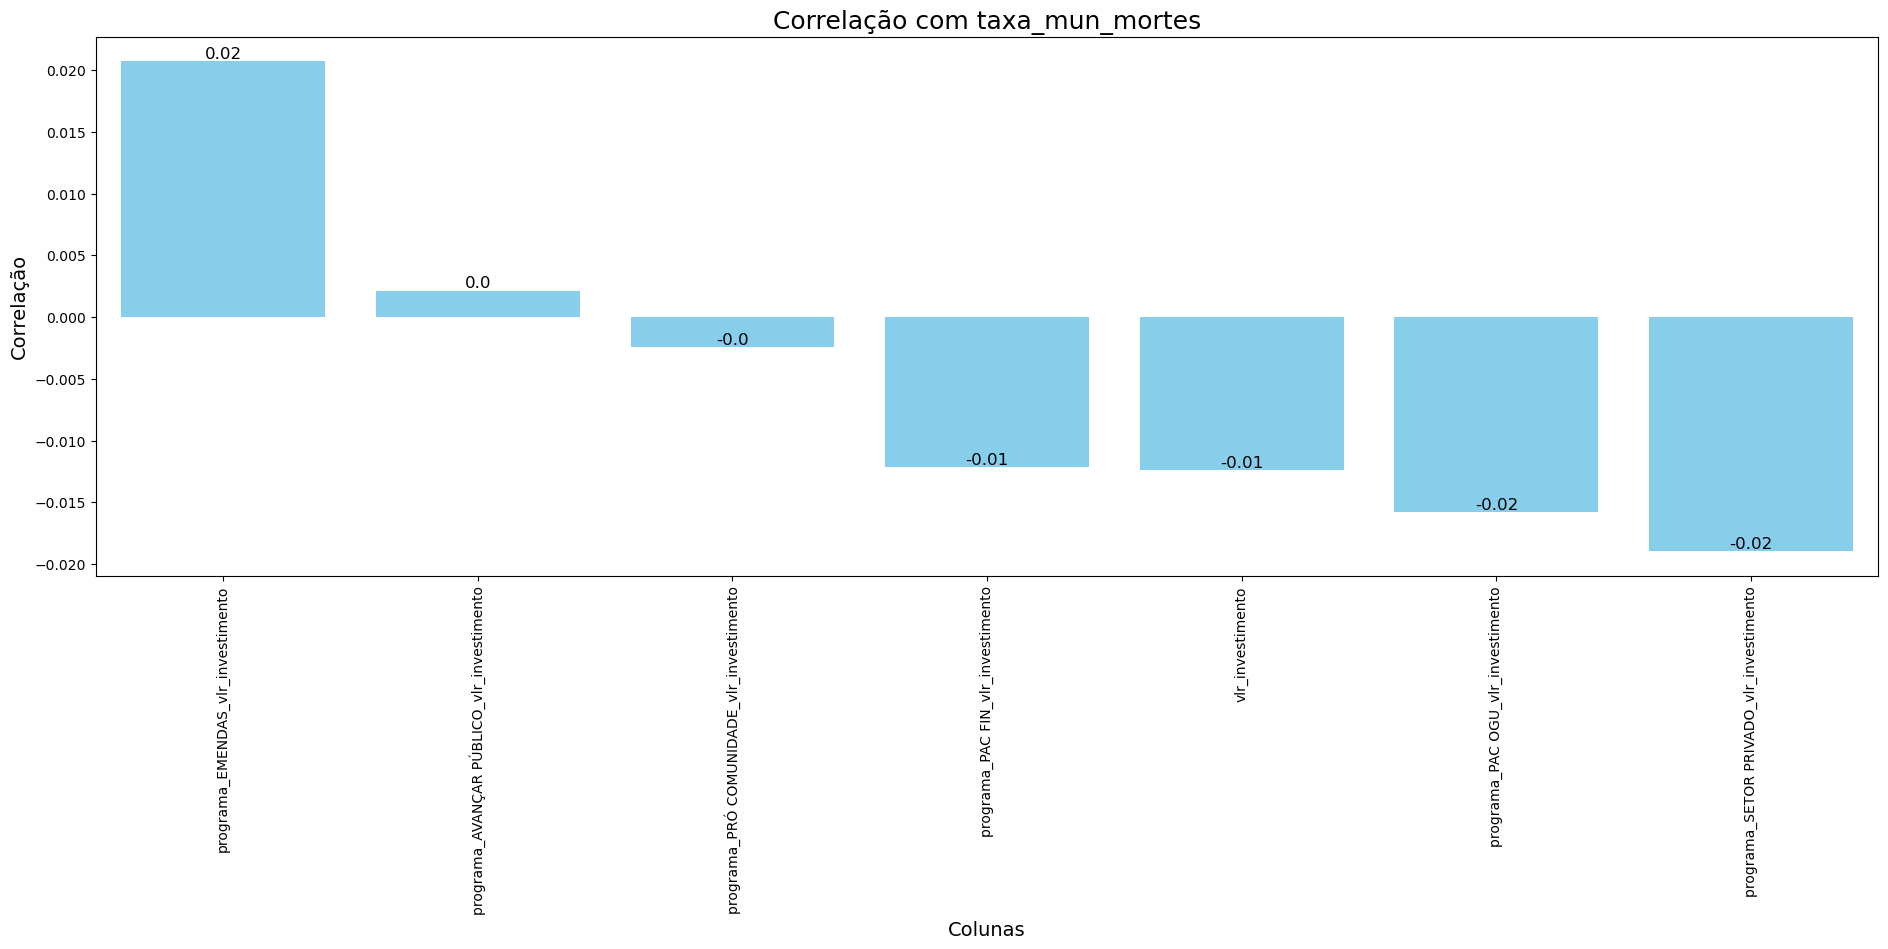

In [22]:
coluna_x = 'taxa_mun_mortes'
correl = plot_correlacao_com_variavel(df_agrupado, coluna_x, colunas_programa)

In [23]:
import statsmodels.api as sm

colunas = ['vlr_investimento', 'Populacao', 'total_mortes']
data_sem_null = df_agrupado.dropna(subset=colunas)
data_sem_null['const'] = 1

# variáveis dependentes e independentes
X = data_sem_null[['const', 'vlr_investimento', 'Populacao']]
y = data_sem_null['total_mortes']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           total_mortes   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:09:51   Log-Likelihood:                -21862.
No. Observations:                5545   AIC:                         4.373e+04
Df Residuals:                    5542   BIC:                         4.375e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2114      0.174  

/tmp/ipykernel_24196/2913214658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sem_null['const'] = 1


In [24]:
import statsmodels.api as sm

def realizar_regressao(df, colunas_dependentes, coluna_independente):
    # Adiciona uma constante ao DataFrame
    df['const'] = 1

    df = df.dropna(subset=colunas_dependentes + [coluna_independente])

    # Define as variáveis dependentes e independentes
    X = df[['const'] + colunas_dependentes]
    y = df[coluna_independente]

    model = sm.OLS(y, X)
    results = model.fit()

    print(results.summary())

    return results


In [25]:
results = realizar_regressao(df_agrupado, ['vlr_investimento', 'Populacao'], 'total_mortes')

                            OLS Regression Results                            
Dep. Variable:           total_mortes   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:09:51   Log-Likelihood:                -21862.
No. Observations:                5545   AIC:                         4.373e+04
Df Residuals:                    5542   BIC:                         4.375e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2114      0.174  

In [26]:
a =   -1.956e-08 
1/a

-51124744.37627812

In [27]:
results = realizar_regressao(df_agrupado, ['vlr_investimento', 'densidade_populacional'], 'total_mortes')

                            OLS Regression Results                            
Dep. Variable:           total_mortes   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     2328.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:09:51   Log-Likelihood:                -24766.
No. Observations:                5545   AIC:                         4.954e+04
Df Residuals:                    5542   BIC:                         4.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

In [28]:
results = realizar_regressao(df_agrupado, ['aux_emp_ciclovia_vlr_investimento', 'Populacao'], 'total_mortes')

                            OLS Regression Results                            
Dep. Variable:           total_mortes   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     8062.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:09:51   Log-Likelihood:                -22677.
No. Observations:                5545   AIC:                         4.536e+04
Df Residuals:                    5542   BIC:                         4.538e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [29]:
results = realizar_regressao(df_agrupado, ['aux_emp_ciclovia_vlr_investimento', 'Populacao'], 'taxa_mun_ciclista_mortes')

                               OLS Regression Results                               
Dep. Variable:     taxa_mun_ciclista_mortes   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     2.467
Date:                      Sat, 01 Jun 2024   Prob (F-statistic):             0.0849
Time:                              01:09:51   Log-Likelihood:                 30618.
No. Observations:                      5545   AIC:                        -6.123e+04
Df Residuals:                          5542   BIC:                        -6.121e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [30]:
results = realizar_regressao(df_agrupado, ['aux_emp_ciclovia_vlr_investimento', 'Populacao'], 'Ciclista_mortes')

                            OLS Regression Results                            
Dep. Variable:        Ciclista_mortes   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2245.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:09:51   Log-Likelihood:                -7132.1
No. Observations:                5545   AIC:                         1.427e+04
Df Residuals:                    5542   BIC:                         1.429e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [31]:
a =   7.717e-09
1/a

129584035.24685758